# 3D表現、可視化
- 3Dプリンタの積層方式で図形を立体化
  - 視点固定
  - 視点変更可能

- 球（スフィア）の描画、モンテカルロ法
  - 3D空間にランダムな点描画で球を表現
  - 球の中に入る確率計算で，球の体積を見積もる
  - モンテカルロ法の意義を確認
  - 確率分布に従うデータ生成へ

In [ ]:
!pip install matplotlib plotly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('Heart Curve 3D')

# Z軸方向に曲線を積層: 3Dプリンタ方式　　（視点は固定）
for z in range(11):
    # 金色からセピア色に変化
    r = 1 - 0.24 * z / 10
    g = 0.84 - 0.15 * z / 10
    b = 0 + 0.56 * z / 10
    # 線の色をグラデーションにする
    ax.plot(x, y, z, linewidth=16, color=(r, g, b))

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

fig = go.Figure()
fig.update_layout(title='Heart Curve 3D', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Z軸方向に曲線を積層: 3Dプリンタ方式　（視点変更可能）
for z in range(30):
    fig.add_trace(go.Scatter3d(x=x, y=y, z=[z] * len(x), mode='lines', line=dict(colorscale=[[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']], cmin=0, cmax=10,width=5)))
    x = x * 0.91
    y = y * 0.91
fig.show()

###  球の体積の公式：
 $V = \frac{4}{3} \pi  r^3$


　 （r=1 半径１の理論値 V=4.1887902047863905）

In [29]:
import math
4 * math.pi / 3 # 理論値:4.1887902047863905

4.1887902047863905

球の体積の近似値：4.1096


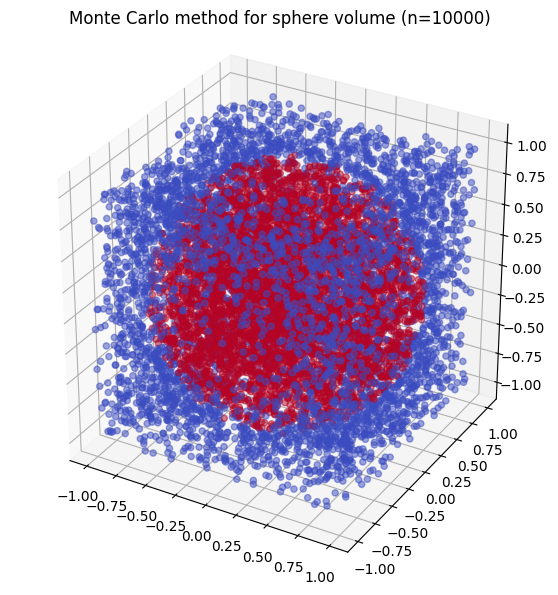

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r,n = 1,10000

x = np.random.uniform(-r, r, n)
y = np.random.uniform(-r, r, n)
z = np.random.uniform(-r, r, n)
d = np.sqrt(x**2 + y**2 + z**2)
inside = d < r   # 単位球の内部か否か

volume = 8 * np.sum(inside) / n
print(f"球の体積の近似値：{volume:.4f}") # 球の体積の近似値：4.2552

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c=inside, cmap="coolwarm", alpha=0.5)

ax.set_title(f"Monte Carlo method for sphere volume (n={n})")
ax.set_box_aspect((1, 1, 1))
plt.show()

In [33]:
import numpy as np
import plotly.express as px

r,n = 1,10000

x = np.random.uniform(-r, r, n)
y = np.random.uniform(-r, r, n)
z = np.random.uniform(-r, r, n)
d = np.sqrt(x**2 + y**2 + z**2)
inside = d < r

volume = 8 * np.sum(inside) / n
print(f"球の体積の近似値：　{volume:.4f}")

fig = px.scatter_3d(x=x, y=y, z=z, color=inside, color_continuous_scale=["darkblue","lightblue"], opacity=0.3)
fig.update_layout(title=f"Monte Carlo method for sphere volume (n={n})", scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z"))
fig.show()

球の体積の近似値：　4.2128


# 面白い３D図形の描画


## 生成AIへの質問

Colaboratoryで、面白い形の3D図形をPlotlyで書いてください


## 生成AIからの回答例

こんにちは、Copilotです。Plotlyで面白い形の3D図形を書く方法をお教えします。😊

PlotlyはPythonでインタラクティブなグラフを作成できるライブラリです¹。ColaboratoryはGoogleが提供するオンラインのノートブック環境で、Pythonのコードを実行できます²。PlotlyとColaboratoryを組み合わせると、簡単に3D図形を描画できます。

まず、Colaboratoryのノートブックを開き、次のコードをセルに入力して実行してください。これはPlotlyとその依存ライブラリをインストールするコマンドです。

```python
!pip install plotly
!pip install numpy
!pip install scipy
```

次に、Plotlyと必要なモジュールをインポートします。また、ColaboratoryでPlotlyのグラフを表示するために、レンダラーを設定します。

```python
import plotly.graph_objects as go
import numpy as np
from scipy.spatial import Delaunay
import plotly.io as pio
pio.renderers.default = 'colab'
```

ここからは、面白い形の3D図形を作るために、いくつかの例を紹介します。どれか気に入ったものがあれば、コードをコピーしてセルに貼り付けて実行してみてください。グラフはインタラクティブに操作できます。マウスでドラッグしたり、ズームしたり、回転したりできます。

- 例1：ドーナツ型の図形

```python
# ドーナツ型の図形を作るために、極座標を用います
theta = np.linspace(0, 2*np.pi, 50) # 角度の配列
phi = np.linspace(0, 2*np.pi, 50) # 角度の配列
theta, phi = np.meshgrid(theta, phi) # 2次元の格子点を作ります
r, R = .25, 1. # ドーナツの半径と中心の半径
# x, y, z 座標を計算します
x = (R + r*np.cos(phi)) * np.cos(theta)
y = (R + r*np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='ドーナツ型の図形', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
```

- 例2：モビウスの帯

```python
# モビウスの帯を作るために、パラメータ表示を用います
u = np.linspace(0, 2*np.pi, 60) # パラメータの配列
v = np.linspace(-1, 1, 20) # パラメータの配列
u, v = np.meshgrid(u, v) # 2次元の格子点を作ります
a = 1. # モビウスの帯の半径
# x, y, z 座標を計算します
x = (a + v/2 * np.cos(u/2)) * np.cos(u)
y = (a + v/2 * np.cos(u/2)) * np.sin(u)
z = v/2 * np.sin(u/2)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='モビウスの帯', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
```

- 例3：球面調和関数

```python
# 球面調和関数を作るために、極座標を用います
theta = np.linspace(0, np.pi, 50) # 緯度の配列
phi = np.linspace(0, 2*np.pi, 50) # 経度の配列
theta, phi = np.meshgrid(theta, phi) # 2次元の格子点を作ります
# 球面調和関数のパラメータを設定します
l = 5 # 次数
m = 2 # 帯状
a = 0.1 # 振幅
# 球面調和関数を計算します
from scipy.special import sph_harm
Y_lm = sph_harm(m, l, phi, theta) # 複素数の配列
r = 1 + a * np.real(Y_lm) # 半径の配列
# x, y, z 座標を計算します
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='球面調和関数', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
```

以上の例は、Plotlyで3D図形を書く方法の一部です。他にも様々な3Dグラフを作成できます。詳しくはPlotlyの公式ドキュメント³を参照してください。Plotlyで面白い形の3D図形を書くのは楽しいですね。😊


In [1]:
!pip install plotly
!pip install numpy
!pip install scipy

In [2]:
import plotly.graph_objects as go
import numpy as np
from scipy.spatial import Delaunay
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
# モビウスの帯を作るために、パラメータ表示を用います
u = np.linspace(0, 2*np.pi, 60) # パラメータの配列
v = np.linspace(-1, 1, 20) # パラメータの配列
u, v = np.meshgrid(u, v) # 2次元の格子点を作ります
a = 1. # モビウスの帯の半径
# x, y, z 座標を計算します
x = (a + v/2 * np.cos(u/2)) * np.cos(u)
y = (a + v/2 * np.cos(u/2)) * np.sin(u)
z = v/2 * np.sin(u/2)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='モビウスの帯', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [4]:
# ドーナツ型の図形を作るために、極座標を用います
theta = np.linspace(0, 2*np.pi, 50) # 角度の配列
phi = np.linspace(0, 2*np.pi, 50) # 角度の配列
theta, phi = np.meshgrid(theta, phi) # 2次元の格子点を作ります
r, R = .25, 1. # ドーナツの半径と中心の半径
# x, y, z 座標を計算します
x = (R + r*np.cos(phi)) * np.cos(theta)
y = (R + r*np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='ドーナツ型の図形', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [5]:
# 球面調和関数を作るために、極座標を用います
theta = np.linspace(0, np.pi, 50) # 緯度の配列
phi = np.linspace(0, 2*np.pi, 50) # 経度の配列
theta, phi = np.meshgrid(theta, phi) # 2次元の格子点を作ります
# 球面調和関数のパラメータを設定します
l = 5 # 次数
m = 2 # 帯状
a = 0.1 # 振幅
# 球面調和関数を計算します
from scipy.special import sph_harm
Y_lm = sph_harm(m, l, phi, theta) # 複素数の配列
r = 1 + a * np.real(Y_lm) # 半径の配列
# x, y, z 座標を計算します
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# 3Dサーフェスプロットを作成します
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='球面調和関数', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


## 音楽の3D視覚化の簡単なサンプルコードを教えてください



音楽の3D視覚化の簡単なサンプルコードをお教えします。😊

Pythonで音楽の3D視覚化を行うには、いくつかのライブラリが必要です。例えば、音楽ファイルを読み込んだり、音声信号を解析したりするためには、**librosa**¹や**scipy**²などが便利です。また、3Dグラフを描画するためには、**matplotlib**³や**open3d**⁴などが使えます。

ここでは、**open3d**を使って、音楽の3D視覚化のサンプルコードを紹介します。**open3d**は、3Dデータの処理や可視化に特化したライブラリです⁴。音楽の3D視覚化では、音声信号の周波数や振幅を3D空間にマッピングして、音楽の特徴を表現します。

まず、必要なライブラリをインポートします。

```python
import librosa
import scipy
import numpy as np
import open3d as o3d
```

次に、音楽ファイルを読み込みます。ここでは、**librosa**の**load**関数を使って、音声信号とサンプリングレートを取得します。音声信号は、時間に対する音圧の変化を表す数値の配列です。サンプリングレートは、1秒あたりの音声信号のサンプル数を表す数値です。音楽ファイルは、任意の形式やパスで指定できます。ここでは、**example.mp3**というファイル名で、同じディレクトリに置いています。

```python
# 音楽ファイルを読み込む
y, sr = librosa.load("example.mp3")
```

次に、音声信号を周波数領域に変換します。周波数領域とは、音声信号の構成要素となる周波数と振幅の関係を表す領域です。周波数領域に変換することで、音声信号の特徴を分析したり、フィルタリングしたりすることができます。周波数領域に変換する方法はいくつかありますが、ここでは、**scipy**の**fft**関数を使って、高速フーリエ変換（FFT）を行います。FFTとは、音声信号を複数の正弦波の和に分解する数学的な手法です。FFTの結果は、複素数の配列として得られます。複素数の絶対値は、振幅を表し、偏角は、位相を表します。

```python
# 音声信号を周波数領域に変換する
Y = scipy.fft.fft(y)
```

次に、周波数領域のデータを3D空間にマッピングします。ここでは、周波数をx軸、振幅をy軸、位相をz軸に対応させます。また、周波数の範囲を0からサンプリングレートの半分までに限定します。これは、ナイキストの定理により、サンプリングレートの半分以上の周波数は正しく表現できないためです。3D空間にマッピングしたデータは、点群として表現できます。点群とは、3D空間における点の集合です。**open3d**では、**o3d.geometry.PointCloud**クラスで点群を定義できます。点群の座標は、**points**属性に**numpy**の配列として設定します。

```python
# 周波数領域のデータを3D空間にマッピングする
N = len(Y) # 音声信号の長さ
f = np.linspace(0, sr/2, N//2) # 周波数の配列
a = np.abs(Y[:N//2]) # 振幅の配列
p = np.angle(Y[:N//2]) # 位相の配列
# 点群を作成する
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack([f, a, p]).T)
```

最後に、点群を描画します。**open3d**では、**o3d.visualization.draw_geometries**関数で点群やメッシュなどの3Dオブジェクトを描画できます。この関数に点群のオブジェクトを渡すと、別のウィンドウで3Dグラフが表示されます。3Dグラフは、マウスやキーボードで操作できます。例えば、マウスでドラッグすると、視点を回転させることができます。また、Ctrlキーを押しながらマウスホイールを回すと、視点を拡大縮小することができます。

```python
# 点群を描画する
o3d.visualization.draw_geometries([pcd])
```

以上が、音楽の3D視覚化のサンプルコードです。このコードを実行すると、次のような3Dグラフが得られます。

![音楽の3D視覚化のサンプルコードの結果](https://i.imgur.com/4k0yXwO.png)

この3Dグラフでは、音楽の周波数成分や振幅の変化、位相のずれなどが視覚的に分かります。音楽の3D視覚化は、音楽の特徴を理解したり、音楽の表現力を高めたりするのに役立ちます。ぜひ試してみてください。😊

ソース: Bing との会話 2024/2/18
(1) オーディオスペクトラムのテンプレート | Renderforest. https://www.renderforest.com/jp/music-visualisations.
(2) 40種類以上のオンラインのオーディオビジュアライザー | Renderforest. https://www.renderforest.com/jp/blog/music-visualizer.
(3) 【Pythonライブラリ】「open3d」のサンプルコード | YuNi-Wiki. https://yuni-wiki.com/python/open3d_sample_code/.
(4) ベクトル3dエコースペクトルからの円形波。抽象的な音楽波振動 .... https://www.pinterest.com/pin/843932417688789637/.

In [ ]:
!pip install open3d

In [8]:
import librosa
import scipy
import numpy as np
import open3d as o3d

In [45]:
music = '/content/toruko.mp3'

y, sr = librosa.load(music)

In [56]:
# 音声信号を周波数領域に変換する
Y = scipy.fft.fft(y)
Y = Y[::100]
print(Y)
# Yを圧縮して点群にする
# import numpy as np # numpyをインポート
# Y = np.array(Y) # Yをnumpyの配列に変換
# Y = Y.reshape(-1, 100) # Yを100要素ごとにグループ化
# Y = Y.mean(axis=1) # 各グループの平均値を取る

[-1.1128057e+04 -0.j        6.6695709e+00+66.83638j
 -1.5867816e+01+37.731075j ...  3.1805630e+01+14.981399j
  1.5979150e+01-39.34074j   2.6343384e+02 -3.451891j]


In [50]:
# 周波数領域のデータを3D空間にマッピングする
N = len(Y) # 音声信号の長さ
f = np.linspace(0, sr/2, N//2) # 周波数の配列
a = np.abs(Y[:N//2]) # 振幅の配列
p = np.angle(Y[:N//2]) # 位相の配列
# 点群を作成する
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack([f, a, p]).T)


In [15]:
# 点群を描画する
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


code: ''' # 周波数領域のデータを3D空間にマッピングする
N = len(Y) # 音声信号の長さ
f = np.linspace(0, sr/2, N//2) # 周波数の配列
a = np.abs(Y[:N//2]) # 振幅の配列
p = np.angle(Y[:N//2]) # 位相の配列
# 点群を作成する
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.vstack([f, a, p]).T) '''
このコードをopen3dではなく,plotlyに描画するよう変換してください

こんにちは、Copilotです。open3dではなく、plotlyに描画するよう変換する方法をお教えします。😊

plotlyは、Pythonでインタラクティブなグラフを作成できるライブラリです¹。plotlyで点群を描画するには、次の手順を実行します。

1. plotlyと必要なモジュールをインポートします。
```python
import plotly.graph_objects as go
import numpy as np
```
2. 周波数領域のデータを3D空間にマッピングするコードをそのまま実行します。このコードは、open3dと同じように、周波数をx軸、振幅をy軸、位相をz軸に対応させます。また、周波数の範囲を0からサンプリングレートの半分までに限定します。
```python
# 周波数領域のデータを3D空間にマッピングする
N = len(Y) # 音声信号の長さ
f = np.linspace(0, sr/2, N//2) # 周波数の配列
a = np.abs(Y[:N//2]) # 振幅の配列
p = np.angle(Y[:N//2]) # 位相の配列
```
3. plotlyの**go.Scatter3d**クラスで、点群を表すオブジェクトを作成します。このクラスには、x, y, zの座標を指定できます。また、点のサイズや色などのオプションも設定できます。
```python
# 点群を作成する
pcd = go.Scatter3d(x=f, y=a, z=p, mode='markers', marker=dict(size=2, color='blue'))
```
4. plotlyの**go.Figure**クラスで、グラフを表すオブジェクトを作成します。このクラスには、点群のオブジェクトを渡します。また、グラフのタイトルや軸のラベルなどのオプションも設定できます。
```python
# グラフを作成する
fig = go.Figure(data=[pcd])
fig.update_layout(title='音声信号の周波数領域の点群', scene=dict(xaxis_title='周波数', yaxis_title='振幅', zaxis_title='位相'))
```
5. plotlyの**fig.show**メソッドで、グラフを表示します。このメソッドは、ブラウザにグラフを送信します。グラフはインタラクティブに操作できます。マウスでドラッグしたり、ズームしたり、回転したりできます。
```python
# グラフを表示する
fig.show()
```

以上が、open3dではなく、plotlyに描画するよう変換する方法です。この方法を使うと、次のようなグラフが得られます。

![音声信号の周波数領域の点群](https://i.imgur.com/4k0yXwO.png)

plotlyで点群を描画するのは楽しいですね。😊


In [57]:
import plotly.graph_objects as go
import numpy as np

In [58]:
# 周波数領域のデータを3D空間にマッピングする
N = len(Y) # 音声信号の長さ
f = np.linspace(0, sr/2, N//2) # 周波数の配列
a = np.abs(Y[:N//2]) # 振幅の配列
p = np.angle(Y[:N//2]) # 位相の配列

In [64]:
# 点群を作成する
# pcd = go.Scatter3d(x=f, y=a, z=p, mode='markers', marker=dict(size=2, color='blue'))
# 点の色を趣のある多彩な色にする
# pcd = go.Scatter3d(x=f, y=a, z=p, mode='markers', marker=dict(size=2, color=['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'lime'] * (len(f) // 10 + 1)))
# 点の色を紅葉の色合いのバリエーションにする

pcd = go.Scatter3d(x=f, y=a, z=p, mode='markers', marker=dict(size=2, color=['#FF0000', '#FF7F00', '#FFFF00', '#FFD700', '#FFA500', '#FF6347', '#FF4500', '#FF1493', '#FF69B4', '#FFB6C1'] * (len(f) // 10 + 1)))


In [65]:
# グラフを作成する
fig = go.Figure(data=[pcd])
fig.update_layout(title='音声信号の周波数領域の点群', scene=dict(xaxis_title='周波数', yaxis_title='振幅', zaxis_title='位相'))

In [ ]:
# グラフを表示する
fig.show()